Saving chickwts.csv to chickwts.csv
Instances: 71 Variables: 2


<Figure size 1000x600 with 0 Axes>

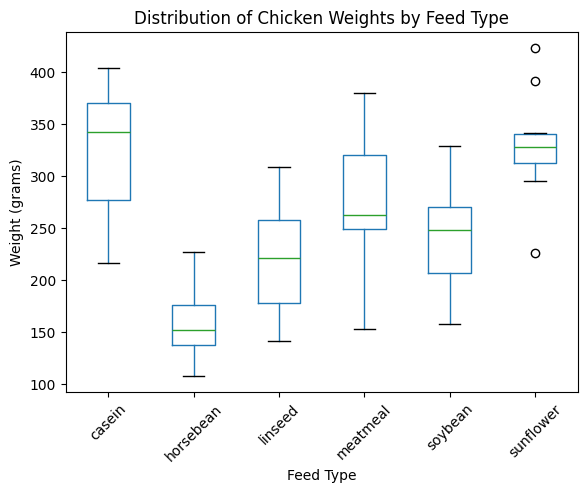

In [ ]:
# Problem 1:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()

chickwts = pd.read_csv("chickwts.csv")

# (a) Instances and variables
instances, variables = chickwts.shape
print("Instances:", instances, "Variables:", variables)

# (b) Add new column for kilograms
chickwts["weight_kg"] = chickwts["weight"] / 1000

# (c) Boxplot
plt.figure(figsize=(10, 6))
chickwts.boxplot(column="weight", by="feed", grid=False)
plt.title("Distribution of Chicken Weights by Feed Type")
plt.suptitle("")
plt.xlabel("Feed Type")
plt.ylabel("Weight (grams)")
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Problem 3:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
hmeq = pd.read_csv("/content/drive/MyDrive/hmeq-1.csv")
print(hmeq.shape)

num_cols = hmeq.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = hmeq.select_dtypes(exclude=[np.number]).columns.tolist()

for col in num_cols:
    hmeq[col] = hmeq[col].fillna(hmeq[col].median())


for col in cat_cols:
    if hmeq[col].isna().any():
        mode_val = hmeq[col].mode(dropna=True)
        if not mode_val.empty:
            hmeq[col] = hmeq[col].fillna(mode_val[0])

print("\nMissing values after cleaning:")
print(hmeq.isna().sum())

def RemoveOutlier(x, k=1.5):
    """
    Input: numeric pandas Series
    Output: Boolean mask (True if value is NOT an outlier)
    """
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (x >= lower) & (x <= upper)

masks = [RemoveOutlier(hmeq[col]) for col in num_cols]
combined_mask = np.logical_and.reduce(masks)
hmeq_clean = hmeq.loc[combined_mask].reset_index(drop=True)

print("\nShape before:", hmeq.shape, "after outlier removal:", hmeq_clean.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5960, 13)

Missing values after cleaning:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Shape before: (5960, 13) after outlier removal: (2999, 13)


In [ ]:
# Problem 2:
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()

clin = pd.read_csv("OVCclinicalinfo.csv")
print("First 5 rows of raw data:")
print(clin.head())
print("\nDataset info:")
print(clin.info())

# (a) Summarize distribution of each variable
print("\nSummary of numerical variables:")
print(clin.describe())

print("\nSummary of categorical variables:")
print(clin.describe(include=['object']))

# (b) Remove Survival column

clin_clean = clin.copy()

if "Survival" in clin_clean.columns:
    clin_clean = clin_clean.drop(columns=["Survival"])

first_col = clin_clean.columns[0]
clin_clean[first_col] = clin_clean[first_col].astype(str)

third_col = clin_clean.columns[2]
clin_clean = clin_clean.rename(columns={third_col: "event"})

for col in ["CA125.POST", "GRADE"]:
    if col in clin_clean.columns:
        clin_clean[col] = pd.to_numeric(clin_clean[col], errors="coerce")

if "Debulk" in clin_clean.columns:
    clin_clean["Debulk"] = clin_clean["Debulk"].replace({"Optimal": "O", "Suboptimal": "S"})
    clin_clean["Debulk"] = clin_clean["Debulk"].astype("category")

# Rename 8th column to "response" and convert to binary
if clin_clean.shape[1] >= 8:
    col8 = clin_clean.columns[7]
    clin_clean = clin_clean.rename(columns={col8: "response"})
    clin_clean["response"] = clin_clean["response"].apply(lambda x: 1 if str(x).lower() in ["true", "1", "yes"] else 0)

print("\nCleaned data preview:")
print(clin_clean.head())

# (c)
# Missing values
print("\nMissing values per column:")
print(clin_clean.isna().sum())

# Outlier detection for numeric columns (IQR method)
numeric_cols = clin_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    q1 = clin_clean[col].quantile(0.25)
    q3 = clin_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((clin_clean[col] < lower) | (clin_clean[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


Saving OVCclinicalinfo.csv to OVCclinicalinfo.csv
First 5 rows of raw data:
  OVC TumorID  Survival  0 = alive   1 = dead  Assigned Stage GRADE Debulk  \
0        0.08        14                     1             4.0     3      S   
1         860        17                     1             4.0     3      O   
2         872       185                     0             3.0     3      S   
3         922       183                     0             3.0     2      S   
4        1024        13                     1             4.0     3      S   

  CA125.POST  response 0=NR, 1=CR   
0       72.3                     0  
1        133                     0  
2        3.1                     1  
3          9                     1  
4         12                     1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OVC Tum


Default Decision Tree Accuracy: 1.0

Classification Report (default):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       900

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900


Decision Tree Rules:

|--- class: 0



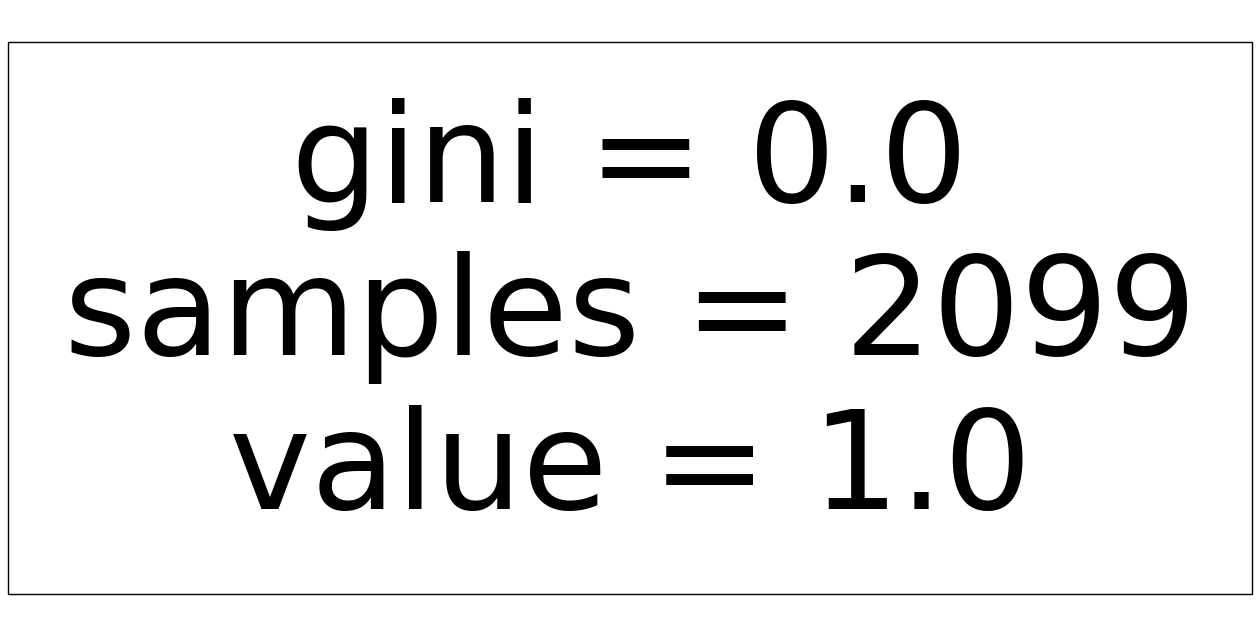


Tuned Decision Tree Accuracy: 1.0

Classification Report (tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       900

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900


Feature Importance (tuned model):
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64


In [ ]:
# Problem 4:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

hmeq_clean["BAD"] = hmeq_clean["BAD"].apply(lambda x: 1 if x == 1 else 0)


X = hmeq_clean.drop(columns=["BAD"])
y = hmeq_clean["BAD"]


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

y_pred_default = clf_default.predict(X_test)

print("\nDefault Decision Tree Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report (default):\n", classification_report(y_test, y_pred_default))

print("\nDecision Tree Rules:\n")
print(export_text(clf_default, feature_names=list(X.columns)))

plt.figure(figsize=(16, 8))
plot_tree(clf_default, feature_names=X.columns, class_names=["Good", "Bad"], filled=True)
plt.show()

clf_tuned = DecisionTreeClassifier(
    max_depth=5, min_samples_split=50, random_state=42
)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report (tuned):\n", classification_report(y_test, y_pred_tuned))

importances = pd.Series(clf_tuned.feature_importances_, index=X.columns)
print("\nFeature Importance (tuned model):")
print(importances.sort_values(ascending=False).head(10))
